In [2]:
#import dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
file_to_load = "C:/Users/moesterling/Documents/Project/google_books_1299.csv"
data = pd.read_csv(file_to_load)
data.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,68,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,none,9.78001E+12,English,15-Mar-12
1,269,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,none,9.78001E+12,English,15-Mar-12
2,397,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,"Fiction , Fantasy , Dragons &amp, Mythical Cre...",9.78001E+12,English,15-Mar-12
3,414,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,"Fiction , Fantasy , Dark Fantasy",9.78001E+12,English,15-Mar-12
4,628,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,"Fiction , War &amp, Military",9.78001E+12,English,15-Mar-12


In [4]:
clean_data = data.drop_duplicates().dropna()
clean_data.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,68,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,none,9.78001E+12,English,15-Mar-12
1,269,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,none,9.78001E+12,English,15-Mar-12
2,397,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,"Fiction , Fantasy , Dragons &amp, Mythical Cre...",9.78001E+12,English,15-Mar-12
3,414,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,"Fiction , Fantasy , Dark Fantasy",9.78001E+12,English,15-Mar-12
4,628,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,"Fiction , War &amp, Military",9.78001E+12,English,15-Mar-12


In [5]:
#find max pages for limit on x-axis
max_x = clean_data['page_count'].max()
max_x

4544

In [6]:
#find max voters for limit on y-axis
max_y = clean_data['voters'].max()
max_y

'997'

Text(1000, 1200, 'y = -0.1x + 867.42')

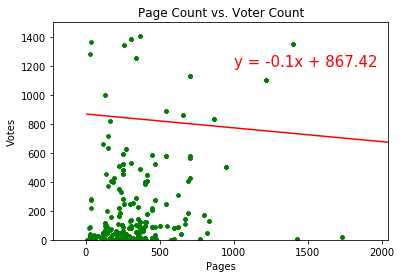

In [59]:
#graph data
x_axis = clean_data['page_count']
y_axis = clean_data['voters'].str.replace(",","").astype(float)
plt.scatter(x_axis, y_axis, color='green', s=10)
plt.xlim(right=max_x - 2500)
plt.ylim(top=1500,bottom=0)
plt.title("Page Count vs. Voter Count")
plt.ylabel("Votes")
plt.xlabel("Pages")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (1000,1200), fontsize=15, color="red")

In [24]:
#Bin by Page Count
bins = [0,249,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000,4250,4500,4750,5000]
group_names = ['0-250', '251-500', '501-750', '751-1000', '1001-1250', '1251-1500', '1501-1750', '1751-2000', '2001-2250', '2251-2500','2501-2750', '2751-3000', '3001-3250', '3251-3500', '3501-3750', '3751-4000', '4001-4250', '4251-4500','4501-4750', '4751-5000']
clean_data['Page Count Bin'] = pd.cut(clean_data['page_count'], bins, labels=group_names)
clean_data


,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Page Bin,Page Count Bin
0,68,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,none,9.78001E+12,English,15-Mar-12,4001-5000,4501-4750
1,269,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,none,9.78001E+12,English,15-Mar-12,4001-5000,4501-4750
2,397,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,"Fiction , Fantasy , Dragons &amp, Mythical Cre...",9.78001E+12,English,15-Mar-12,4001-5000,4501-4750
3,414,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,"Fiction , Fantasy , Dark Fantasy",9.78001E+12,English,15-Mar-12,4001-5000,4501-4750
4,628,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,751,88.06,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,4544,"Fiction , War &amp, Military",9.78001E+12,English,15-Mar-12,4001-5000,4501-4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,313,Summary: The Compound Effect,Nine99 Innovation Lab,5.0,1,3.94,SAR,Must-read summary of Darren Hardy’s book: “The...,Nine99 Innovation Lab (OPC) Pvt Ltd,7,"Business & Economics , Mentoring & Coaching","Flowing text, Google-generated PDF",English,7-Jul-19,0-250,0-250
1293,328,Summary: The Compound Effect,Nine99 Innovation Lab,5.0,1,3.94,SAR,Must-read summary of Darren Hardy’s book: “The...,Nine99 Innovation Lab (OPC) Pvt Ltd,7,"Business & Economics , Mentoring & Coaching","Flowing text, Google-generated PDF",English,7-Jul-19,0-250,0-250
1294,502,Summary: The Compound Effect,Nine99 Innovation Lab,5.0,1,3.94,SAR,Must-read summary of Darren Hardy’s book: “The...,Nine99 Innovation Lab (OPC) Pvt Ltd,7,"Business & Economics , Mentoring & Coaching","Flowing text, Google-generated PDF",English,7-Jul-19,0-250,0-250
1295,636,Summary: The Compound Effect,Nine99 Innovation Lab,5.0,1,3.94,SAR,Must-read summary of Darren Hardy’s book: “The...,Nine99 Innovation Lab (OPC) Pvt Ltd,7,"Business & Economics , Mentoring & Coaching","Flowing text, Google-generated PDF",English,7-Jul-19,0-250,0-250


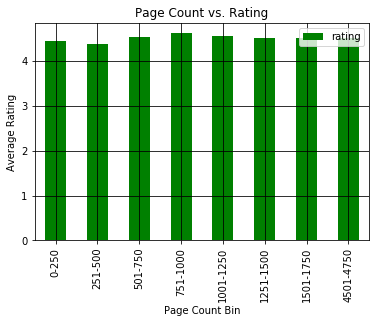

In [55]:
#Groupby Page Count
groupby_df = pd.DataFrame(clean_data.groupby('Page Count Bin').mean()['rating'])
bar = groupby_df.dropna().plot(kind='bar', title='Page Count vs. Rating', color='green');
bar.set_ylabel("Average Rating")
bar.grid('on', which='major', axis='x', color='black')
bar.grid('on', which='major', axis='y', color='black')

